In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [29]:
img = cv2.imread("CITRA_WARNA_NAMAA.jpg")

In [30]:
img.shape

(2250, 3508, 3)

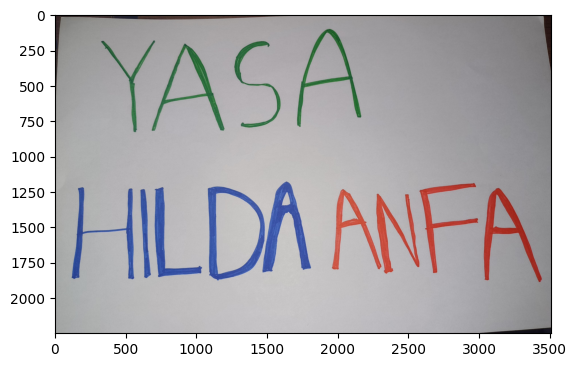

In [31]:
plt.imshow(rgb)

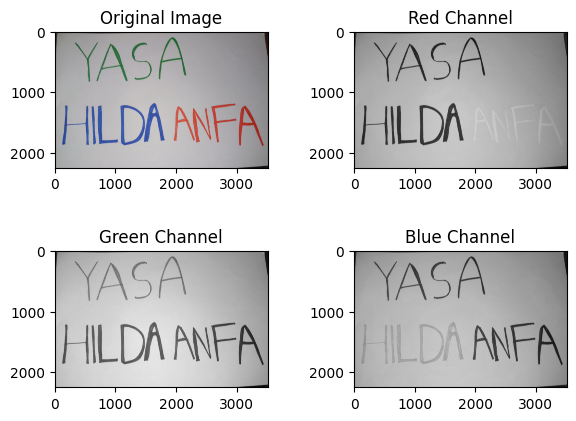

In [36]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.title('Original Image')

# Menampilkan saluran Merah (Red)
plt.subplot(2, 2, 2)
plt.imshow(rgb[:, :, 0], cmap="gray")
plt.title('Red Channel')

# Menampilkan saluran Hijau (Green)
plt.subplot(2, 2, 3)
plt.imshow(rgb[:, :, 1], cmap="gray")
plt.title('Green Channel')

# Menampilkan saluran Biru (Blue)
plt.subplot(2, 2, 4)
plt.imshow(rgb[:, :, 2], cmap="gray")
plt.title('Blue Channel')


plt.tight_layout(pad=3.0)  # Tambahkan ini untuk memberi jarak antar subplot
plt.show()



## MEMBUAT HISTOGRAM

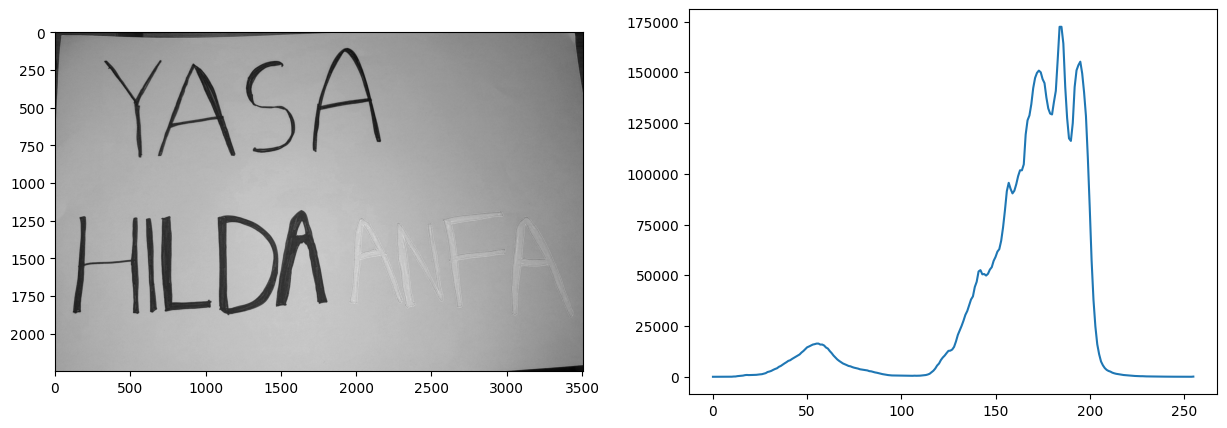

In [40]:
# Merah
merah = rgb[:, :, 0]  # Mengambil channel merah (karena format BGR)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([merah], [0], None, [256], [0, 256])
axs[0].imshow(merah, cmap='gray')
axs[1].plot(hist)
plt.show()

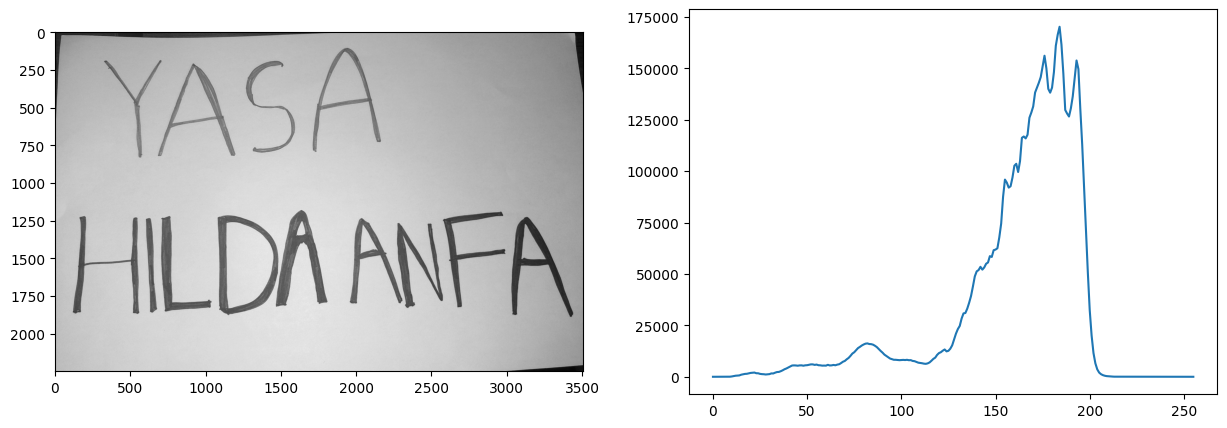

In [41]:
# Hijau
hijau = rgb[:, :, 1]  # Mengambil channel hijau (karena format BGR)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([hijau], [0], None, [256], [0, 256])
axs[0].imshow(hijau, cmap='gray')
axs[1].plot(hist)
plt.show()

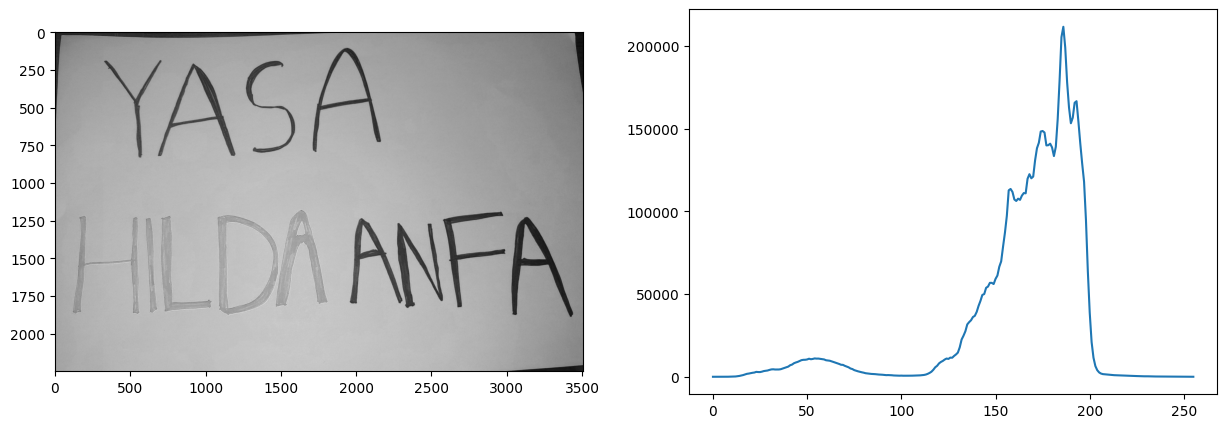

In [42]:
# Biru
biru = rgb[:, :, 2]  # Mengambil channel biru (karena format BGR)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[0].imshow(biru, cmap='gray')
axs[1].plot(hist)
plt.show()

## AMBANG BATAS

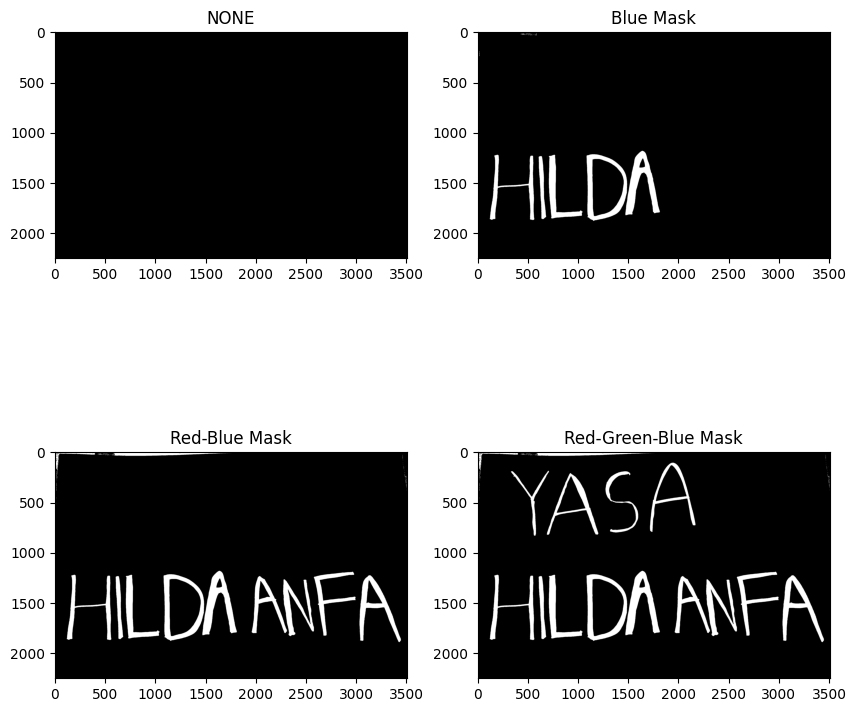

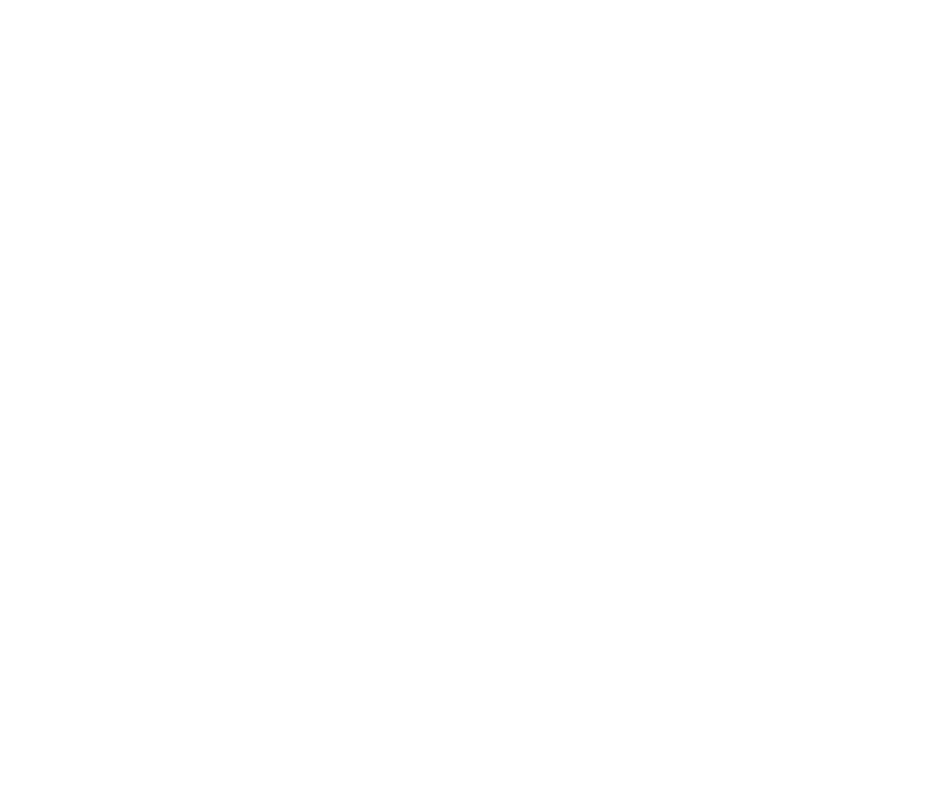

In [43]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the red masks
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue Mask')
plt.axis('off')

plt.show()